main crop script

In [19]:
import os,yaml,shutil,cv2
from itertools import chain

cropped_folder_path = "./cropped2"
dataset_path = "./dataset"

if not os.path.exists(cropped_folder_path):
    os.makedirs(cropped_folder_path)

#resized_path = "reshaped/"

my_dict = {}
rem_dict ={} 

##########read yaml file to get class information #################

for file_names in os.listdir(dataset_path):
    if file_names.endswith(".yaml"):
        yaml_path = dataset_path+"/"+file_names
        #yaml_path = os.path.join(dataset_path,file_names)

with open(yaml_path, 'r') as file:
    # load the contents of the file into a Python object
    data = yaml.load(file, Loader=yaml.FullLoader)
class_yaml = data["names"]

##########################################################
#create rem_dictionary , for each class, add files names which has contain that class labels in it 

for class_name in class_yaml:
    rem_dict.setdefault(class_name, [])
    my_dict.setdefault(class_name, {})
    my_dict[class_name].update({"images":{},"cropped_logo_images":[],"average_size":{},"counter":1})

###################################################

process_counter = 0

for my_folder in os.listdir(dataset_path):
    #check if file is folder 
    #sub_folder = os.path.join(dataset_path, my_folder)
    sub_folder = dataset_path+"/"+my_folder
    if os.path.isdir(sub_folder):
        for txt_file_name in os.listdir(sub_folder+"/labels"):

            #img_name_short = txt_file_name.split('_')[0]
            jpg_path = sub_folder+"/images/"+ txt_file_name.replace('.txt', '.jpg')
  
            img = cv2.imread(jpg_path)
            try:
                
                with open(sub_folder+"/labels/"+txt_file_name) as f:
                    lines = f.read().strip().split('\n')
                
                for line in lines:
                    process_counter +=1
                    if process_counter %100 ==0:
                        print(process_counter)
                    
                    class_order, x, y, w, h = line.strip().split()
                    label_name = class_yaml[int(class_order)]
                    x, y, w, h = float(x), float(y), float(w), float(h)
                    x1, y1, x2, y2 = round((x-w/2) * 1280), round((y-h/2) * 720), round((x+w/2) * 1280), round((y+h/2) * 720)
                    
                    #image cropping and saving 
                    
                    
                    counter = my_dict[label_name]["counter"]

                    cropped_img_name = f"{label_name}_{counter}.jpg"
                    #cropped_img_path = os.path.join(cropped_folder_path, cropped_img_name)
                    cropped_img_path = cropped_folder_path+"/"+cropped_img_name

                    my_dict[label_name]["cropped_logo_images"].append({"cropped_path":cropped_img_path,"size":{"x":x2-x1,"y":y2-y1},"source_image":jpg_path})
                    
                    #my_dict[label_name]["cropped_logo_images"].update({cropped_img_path:{"size":{"x":x2-x1,"y":y2-y1},"source_image":jpg_path}})
                    
                    rem_dict[label_name].append(sub_folder+"/images/"+ txt_file_name.replace('.txt', '.jpg'))

                    my_dict[label_name]["counter"] += 1
                    cropped_img = img[y1:y2, x1:x2]
                    cv2.imwrite(cropped_img_path, cropped_img)

            except ValueError:
                print("error","image doesnt have logo")
                pass

##################################################################        
#to add images from rem_dict
for i in rem_dict:
    my_dict[i].update({"images":rem_dict[i]})
del rem_dict

#GET AVERAGE OF CROPPED SIZE BY CLASS#
##################################################################
for q in my_dict:
    x_sum,y_sum=0,0
    for m in my_dict[q]["cropped_logo_images"]:
        div = len(my_dict[q]["cropped_logo_images"])
        #used for {} cropped images
        #x_sum += my_dict[q]["cropped_logo_images"][m]["size"]["x"]

        x_sum += m["size"]["x"]
        y_sum += m["size"]["y"]
    x_avg, y_avg = round(x_sum/div), round(y_sum/div)
    my_dict[q]["average_size"].update({"x":x_avg,"y":y_avg})
#####################################################################
#to clear duplicate image names in images dict
for classes in my_dict:
    my_dict[classes]["images"] = [*{*my_dict[classes]["images"]}]

#############Reshaping cropped imaged in scale of average #############
counter = 0
for clas_name in my_dict:
    #avg_size =  (my_dict[clas_name]["average_size"]["x"],my_dict[clas_name]["average_size"]["y"])

    avg_size =  (round(my_dict[clas_name]["average_size"]["x"]), round(my_dict[clas_name]["average_size"]["y"]))

    #print(avg_size)
    for image_path in my_dict[clas_name]["cropped_logo_images"]:
    
        img = cv2.imread(image_path["cropped_path"])  
        img_resized = cv2.resize(img, avg_size)
        cv2.imwrite(image_path["cropped_path"], img_resized)

        counter+=1
        if counter%100 ==0:
            print(counter,"image are resized")


error image doesnt have logo
error image doesnt have logo
100
error image doesnt have logo
error image doesnt have logo
200
error image doesnt have logo
300
error image doesnt have logo
error image doesnt have logo
error image doesnt have logo
400
error image doesnt have logo
error image doesnt have logo
error image doesnt have logo
500
error image doesnt have logo
error image doesnt have logo
600
error image doesnt have logo
700
800
error image doesnt have logo
900
1000
1100
1200
error image doesnt have logo
1300
1400
error image doesnt have logo
1500
1600
error image doesnt have logo
1700
1800
1900
2000
error image doesnt have logo
2100
error image doesnt have logo
error image doesnt have logo
error image doesnt have logo
2200
2300
2400
2500
2600
2700
2800
2900
error image doesnt have logo
3000
error image doesnt have logo
3100
3200
error image doesnt have logo
3300
3400
error image doesnt have logo
error image doesnt have logo
3500
error image doesnt have logo
error image doesnt hav

aims to do 

In [ ]:
# dict A101 ve içerisinde tüm croplanmış logoları barındırıyor.

# feature extraction algorithm

def uniquefiy(class_name):
    for image_d in d[class_name]["cropped_images"]:
        image_d.setdefault("image",
        cv2.imread(image_d["path"])) 

        key, des = image_d["image"] # bunu feature extraction algoritmasına vericeksin
        image_d["key_points"], image_d["kp_description"], 
        # key ve desi dicte kaydet

    # 20 tane logo varsa 
    for ile içerisinde döneceksin tersinden başlayacaksın:
        kp, kp_des
        for 0 -> i 
            kp, kp_des
            similarity_score()
            100
            image_d["unique"] = False
            


   # tüm resimleri load yapacaksın.
   # croppedimage = [{path, size, image: cv2.imread("path")}]


In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

import yaml
with open("dataset/data.yaml", 'r') as file:
    # load the contents of the file into a Python object
    data = yaml.load(file, Loader=yaml.FullLoader)
class_yaml = data["names"]

##########################################################
#create rem_dictionary , for each class, add files names which has contain that class labels in it 
new_dict = {}
for class_name in class_yaml:
    #rem_dict.setdefault(class_name, [])
    new_dict.setdefault(class_name, {})
    new_dict[class_name].update({"images":{},"cropped_logo_images":[],"average_size":{},"counter":1})


In [13]:
def matcher(img1, img2):
    sift = cv2.SIFT_create() 


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1, des2, k=2)
    

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])
    
    img3 = cv2.drawMatchesKnn(img1, kp1,img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3[...,::-1]) #rgb conversation
    plt.show()
    

    return round((len(good_matches) / (len(kp1))) * 100)

In [14]:
def matcher_txt(img1, img2):
    sift = cv2.SIFT_create() 


    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv2.BFMatcher()

    matches = bf.knnMatch(des1, des2, k=2)
    

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append([m])
    
    img3 = cv2.drawMatchesKnn(img1, kp1,img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #plt.imshow(img3[...,::-1]) #rgb conversation
    #plt.show()
    

    return round((len(good_matches) / (len(kp1))) * 100)

In [ ]:

size = "original"
path_list = os.listdir(f"matching_test/{size}")
counter = 0
a = cv2.imread("matching_test/full.png")

for i in path_list:

    #a = cv2.imread(f"matching_test/{size}/a101-logo_2.jpg")
    b = cv2.imread(f"matching_test/{size}/{i}")
    a_resized = cv2.resize(a, (b.shape[1],b.shape[0]))
    match = matcher(a,b)

    match2 = matcher(a_resized,b)
    #my_dict[size].append(match)
    #if match > 50:
    print(f" 'logo_1' match '{i[:9]}' = %",match)

    print(f" 'logo_1' match2 '{i[:9]}' = %",match2,"\n")

    counter +=1
    #print(counter)

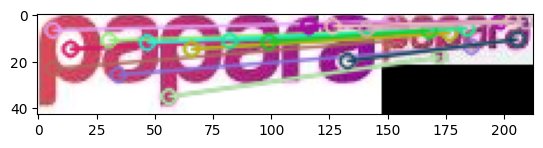

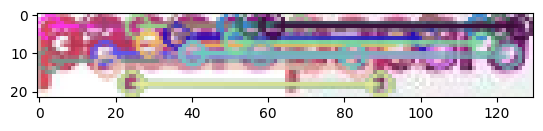

 'logo_1' match 'papara_17' = % 30
 'logo_1' match2 'papara_17' = % 44 



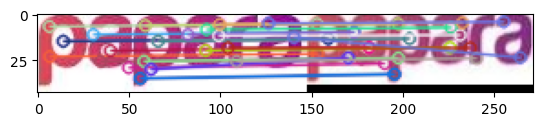

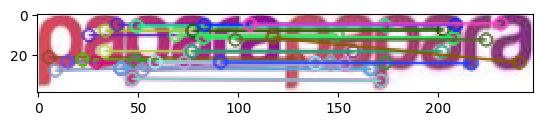

 'logo_1' match 'papara_16' = % 42
 'logo_1' match2 'papara_16' = % 54 



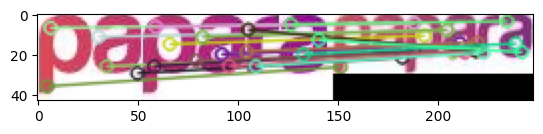

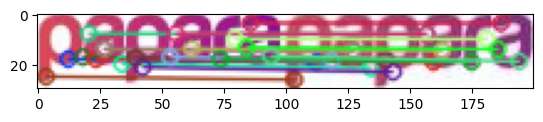

 'logo_1' match 'papara_14' = % 33
 'logo_1' match2 'papara_14' = % 46 



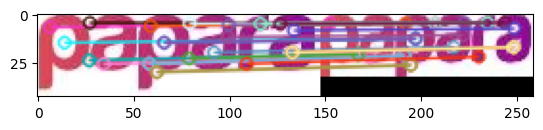

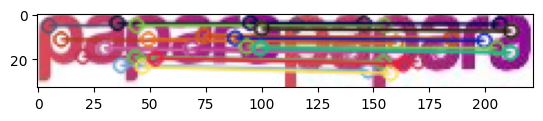

 'logo_1' match 'papara_15' = % 42
 'logo_1' match2 'papara_15' = % 45 



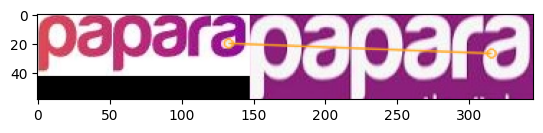

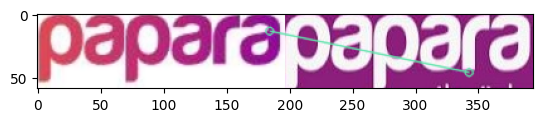

 'logo_1' match 'papara_11' = % 2
 'logo_1' match2 'papara_11' = % 2 



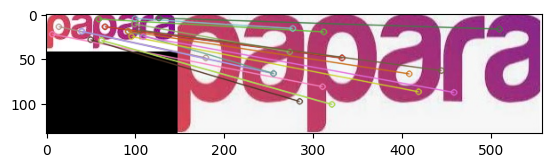

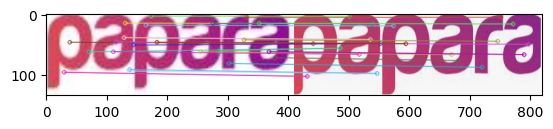

 'logo_1' match 'papara_10' = % 28
 'logo_1' match2 'papara_10' = % 32 



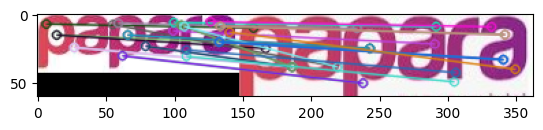

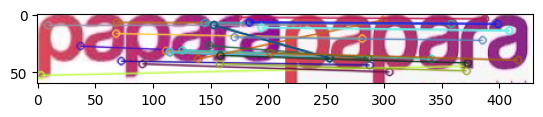

 'logo_1' match 'papara_12' = % 42
 'logo_1' match2 'papara_12' = % 35 



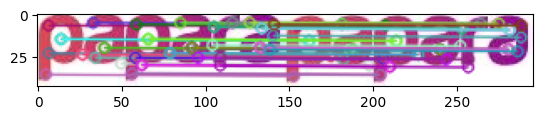

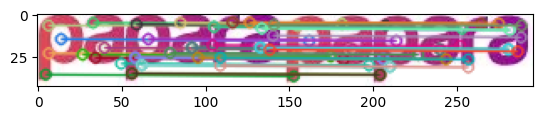

 'logo_1' match 'papara_13' = % 70
 'logo_1' match2 'papara_13' = % 70 



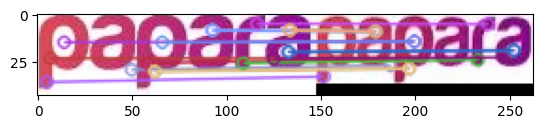

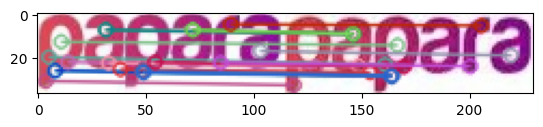

 'logo_1' match 'papara_5.' = % 27
 'logo_1' match2 'papara_5.' = % 41 



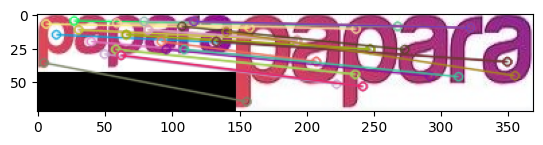

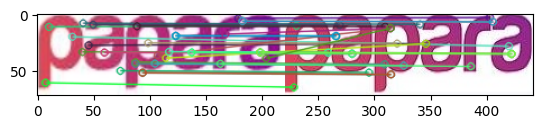

 'logo_1' match 'papara_4.' = % 42
 'logo_1' match2 'papara_4.' = % 38 



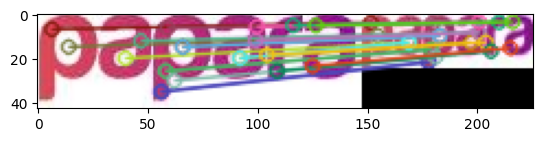

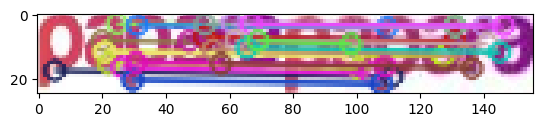

 'logo_1' match 'papara_6.' = % 33
 'logo_1' match2 'papara_6.' = % 47 



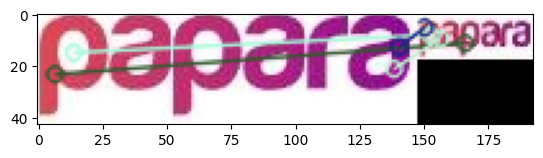

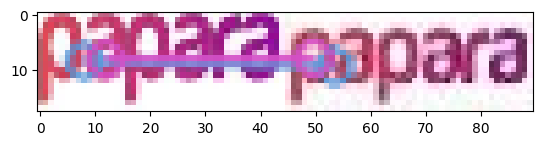

 'logo_1' match 'papara_7.' = % 6
 'logo_1' match2 'papara_7.' = % 14 



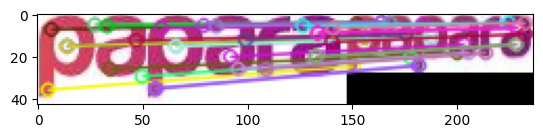

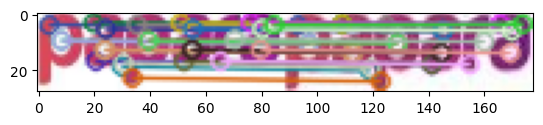

 'logo_1' match 'papara_3.' = % 42
 'logo_1' match2 'papara_3.' = % 55 



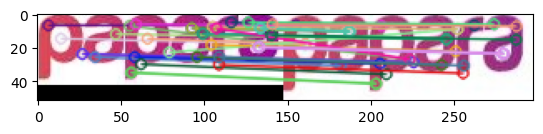

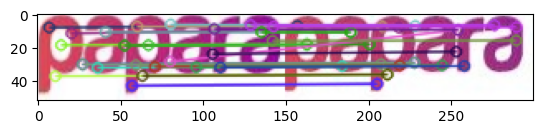

 'logo_1' match 'papara_2.' = % 52
 'logo_1' match2 'papara_2.' = % 54 



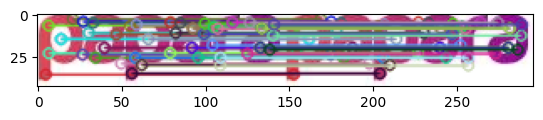

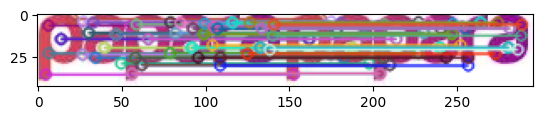

 'logo_1' match 'papara_1.' = % 100
 'logo_1' match2 'papara_1.' = % 100 



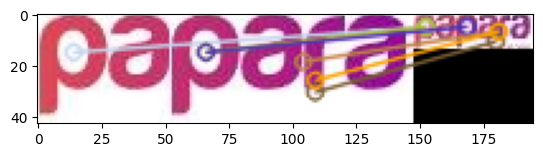

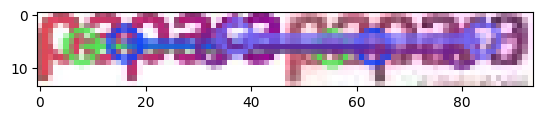

 'logo_1' match 'papara_9.' = % 9
 'logo_1' match2 'papara_9.' = % 44 



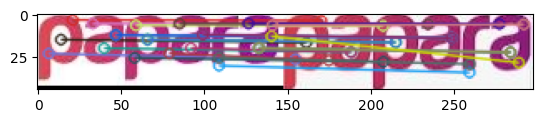

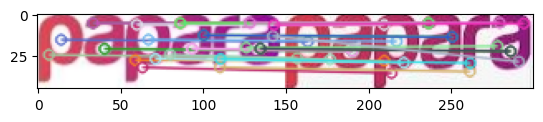

 'logo_1' match 'papara_8.' = % 38
 'logo_1' match2 'papara_8.' = % 46 



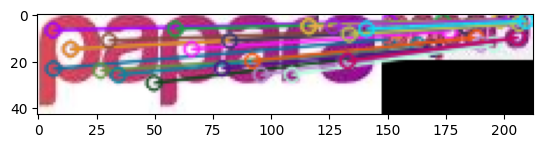

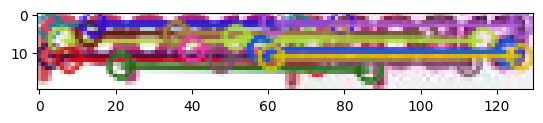

 'logo_1' match 'papara_20' = % 36
 'logo_1' match2 'papara_20' = % 45 



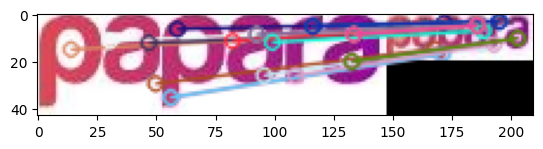

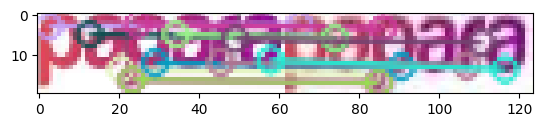

 'logo_1' match 'papara_18' = % 30
 'logo_1' match2 'papara_18' = % 42 



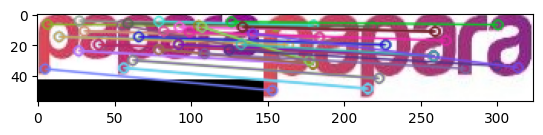

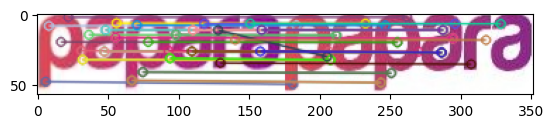

 'logo_1' match 'papara_19' = % 61
 'logo_1' match2 'papara_19' = % 61 



In [5]:

size = "original"
path_list = os.listdir(f"matching_test/{size}")
counter = 0

a = cv2.imread("matching_test/papara_1.jpg")

for i in path_list:

    b = cv2.imread(f"matching_test/{size}/{i}")
    a_resized = cv2.resize(a, (b.shape[1],b.shape[0]))


    match = matcher(a,b)
    match2 = matcher(a_resized,b)

    #my_dict[size].append(match)
    if match > 0:
        print(f" 'logo_1' match '{i[:9]}' = %",match)

        print(f" 'logo_1' match2 '{i[:9]}' = %",match2,"\n")

    counter +=1
    #print(counter)

In [36]:

size = "original"
avg_size = (138,44)

path_list = os.listdir(f"matching_test/{size}")
counter = 0


a = cv2.imread("matching_test/papara_1.jpg")

for i in path_list:

    b = cv2.imread(f"matching_test/{size}/{i}")

    if b.shape[1] > 138:
        b_resized  = cv2.resize(b,(150,60)) 
    else:
        b_resized  = cv2.resize(b,(75,30)) 
    
    if a.shape[1] > 138:
        a_2  = cv2.resize(a,(150,60)) 
    else:
        a_2  = cv2.resize(a,(75,30)) 

    a_resized = cv2.resize(a, (b_resized.shape[1],b_resized.shape[0]))

    match3 = matcher_txt(a_2,b_resized)
    match = matcher_txt(a,b_resized)
    match2 = matcher_txt(a_resized,b_resized)

    #my_dict[size].append(match)
    filter = 60
    if match > filter or match2>filter:
        print(f" 'logo_1' match '{i[:9]}' = %",match)
        print(f" 'logo_1' match2 '{i[:9]}' = %",match2)
        print(f" 'logo_1' match3 '{i[:9]}' = %",match3,"\n")

    counter +=1
print(counter)



 'logo_1' match 'papara_3.' = % 23
 'logo_1' match2 'papara_3.' = % 64
 'logo_1' match3 'papara_3.' = % 45 

 'logo_1' match 'papara_1.' = % 38
 'logo_1' match2 'papara_1.' = % 100
 'logo_1' match3 'papara_1.' = % 100 

20


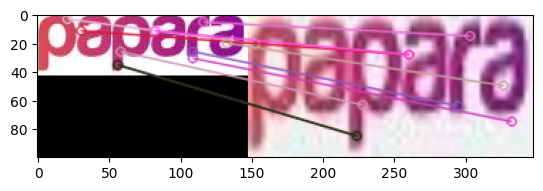

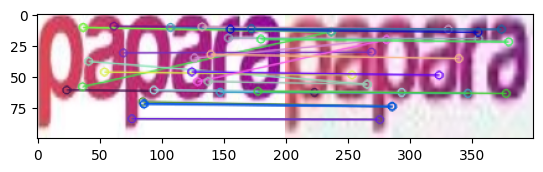

 'logo_1' match 'papara_17' = % 16
 'logo_1' match2 'papara_17' = % 32


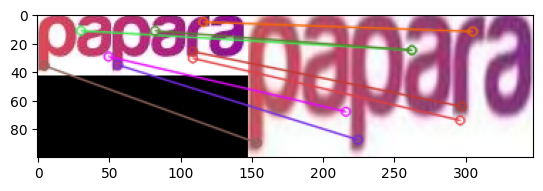

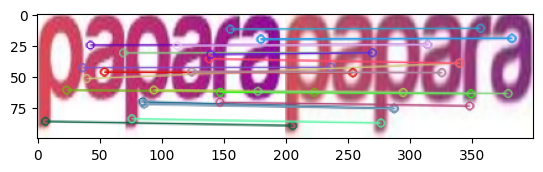

 'logo_1' match 'papara_16' = % 12
 'logo_1' match2 'papara_16' = % 29


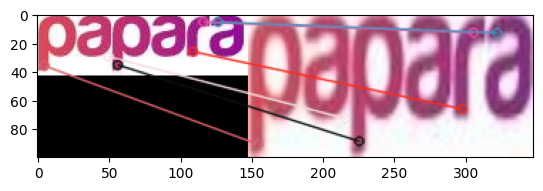

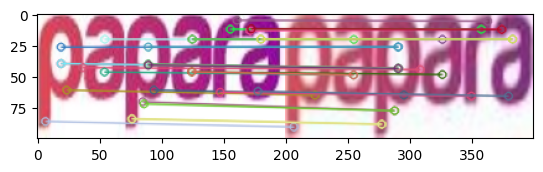

 'logo_1' match 'papara_14' = % 9
 'logo_1' match2 'papara_14' = % 36


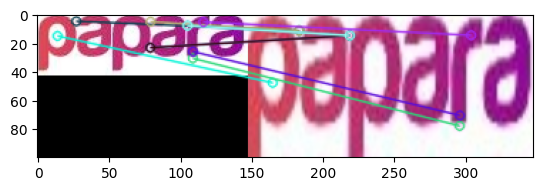

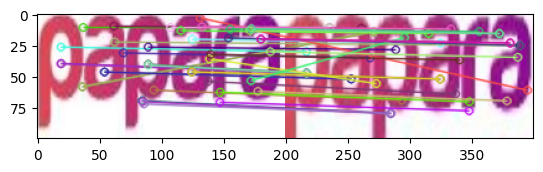

 'logo_1' match 'papara_15' = % 16
 'logo_1' match2 'papara_15' = % 46


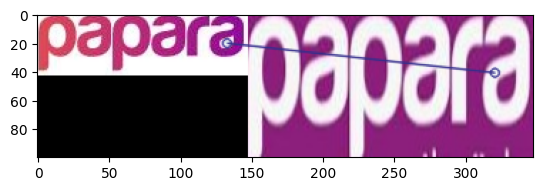

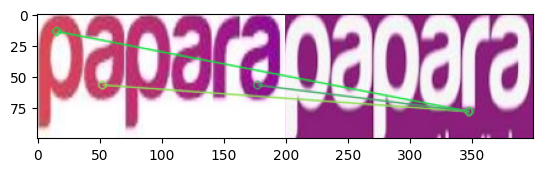

 'logo_1' match 'papara_11' = % 2
 'logo_1' match2 'papara_11' = % 4


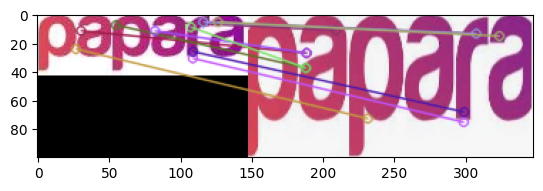

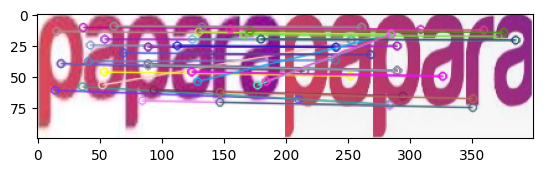

 'logo_1' match 'papara_10' = % 17
 'logo_1' match2 'papara_10' = % 45


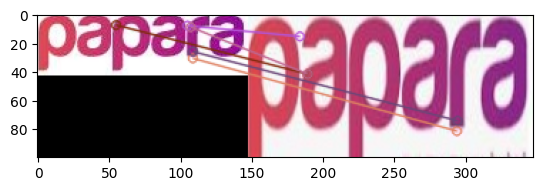

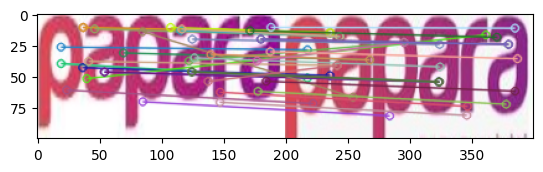

 'logo_1' match 'papara_12' = % 8
 'logo_1' match2 'papara_12' = % 43


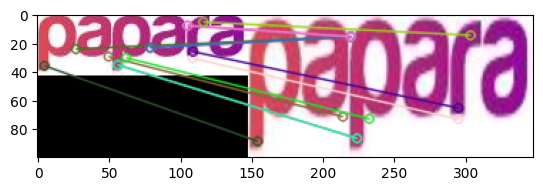

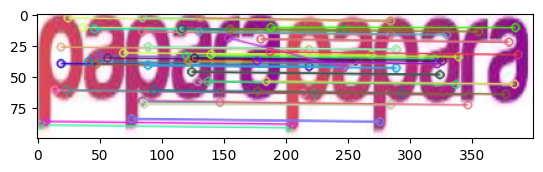

 'logo_1' match 'papara_13' = % 20
 'logo_1' match2 'papara_13' = % 62


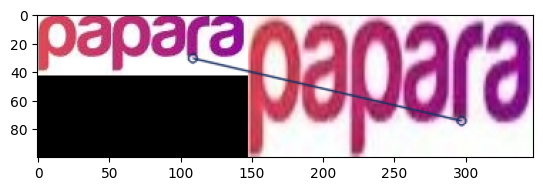

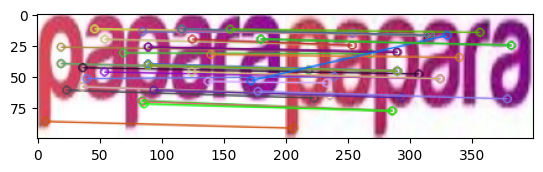

 'logo_1' match 'papara_5.' = % 2
 'logo_1' match2 'papara_5.' = % 45


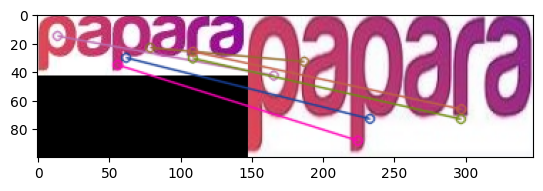

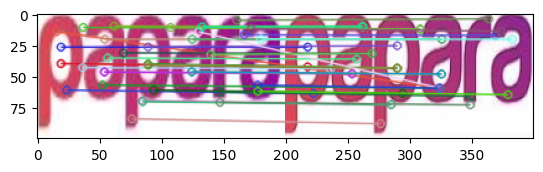

 'logo_1' match 'papara_4.' = % 9
 'logo_1' match2 'papara_4.' = % 45


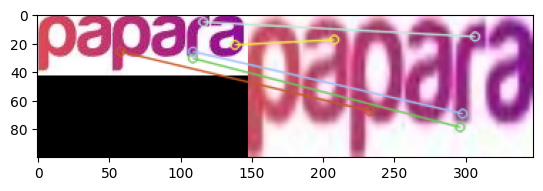

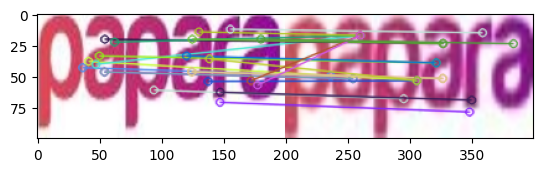

 'logo_1' match 'papara_6.' = % 8
 'logo_1' match2 'papara_6.' = % 26


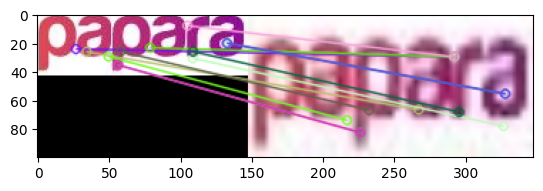

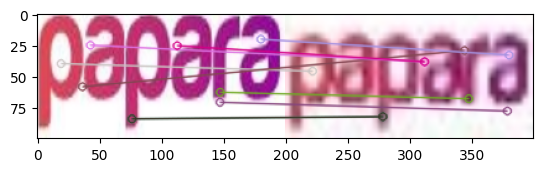

 'logo_1' match 'papara_7.' = % 19
 'logo_1' match2 'papara_7.' = % 11


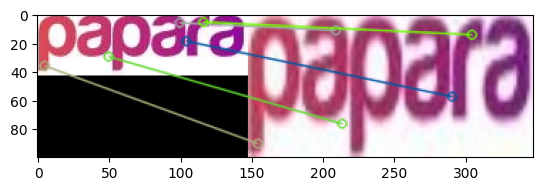

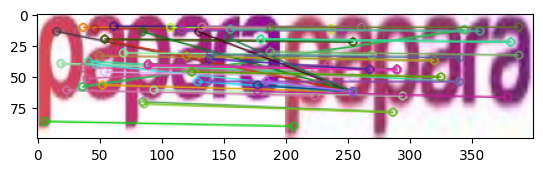

 'logo_1' match 'papara_3.' = % 8
 'logo_1' match2 'papara_3.' = % 61


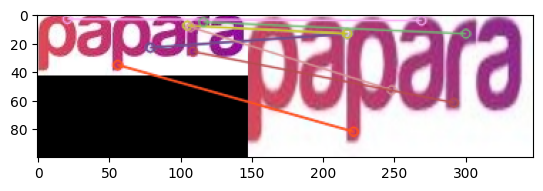

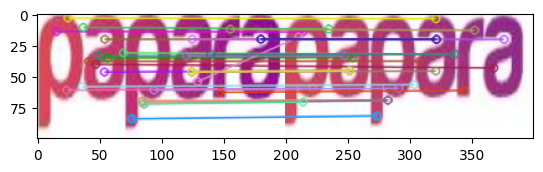

 'logo_1' match 'papara_2.' = % 16
 'logo_1' match2 'papara_2.' = % 36


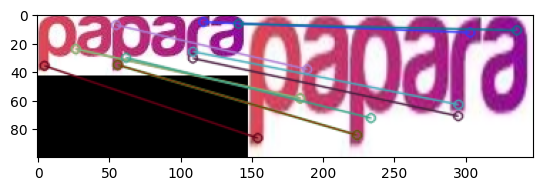

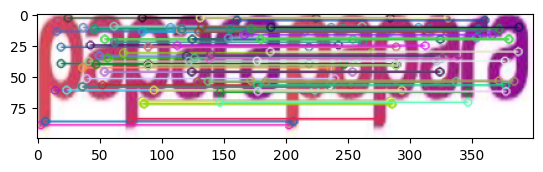

 'logo_1' match 'papara_1.' = % 17
 'logo_1' match2 'papara_1.' = % 100


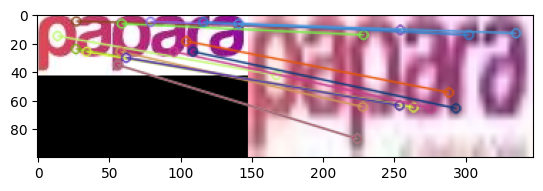

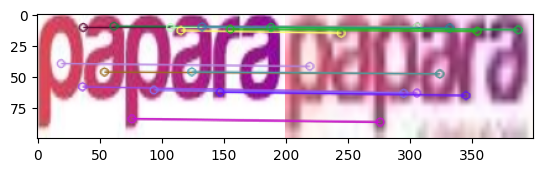

 'logo_1' match 'papara_9.' = % 23
 'logo_1' match2 'papara_9.' = % 18


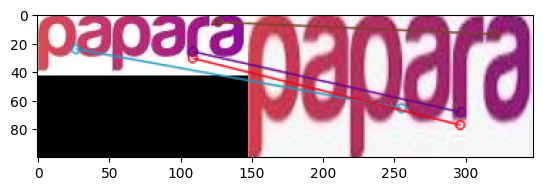

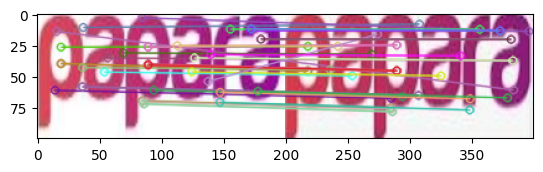

 'logo_1' match 'papara_8.' = % 6
 'logo_1' match2 'papara_8.' = % 44


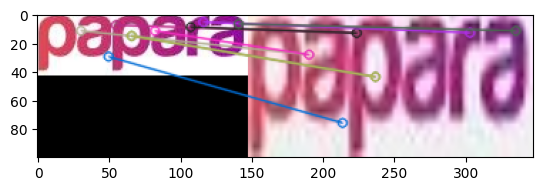

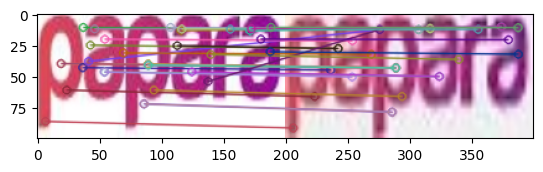

 'logo_1' match 'papara_20' = % 14
 'logo_1' match2 'papara_20' = % 39


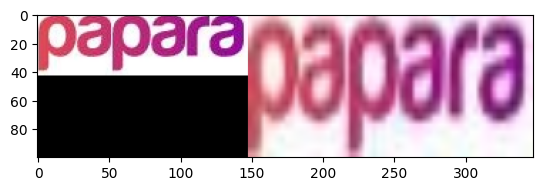

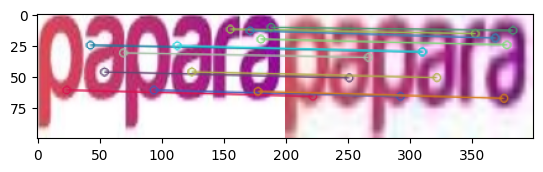

 'logo_1' match 'papara_18' = % 0
 'logo_1' match2 'papara_18' = % 14


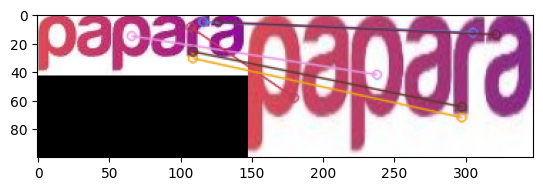

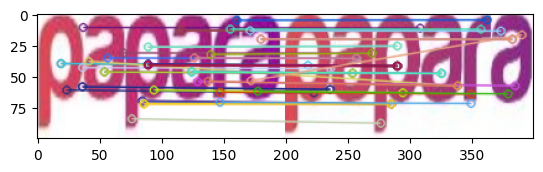

 'logo_1' match 'papara_19' = % 9
 'logo_1' match2 'papara_19' = % 50
20


In [41]:

size = "original"
avg_size = (138,44)

path_list = os.listdir(f"matching_test/{size}")
counter = 0


a = cv2.imread("matching_test/papara_1.jpg")

for i in path_list:

    b = cv2.imread(f"matching_test/{size}/{i}")


    a_resized = cv2.resize(a,(200,100))
    b_resized = cv2.resize(b,(200,100))
   
    match = matcher(a,b_resized)
    match2 = matcher(a_resized,b_resized)

    filter = 60
    #if match > filter or match2>filter:
    print(f" 'logo_1' match '{i[:9]}' = %",match)
    print(f" 'logo_1' match2 '{i[:9]}' = %",match2)


    counter +=1
print(counter)

